In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
#import shapefile

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read PLUTO data of Manhattan.
Mn = pd.read_csv('Mn.csv')
Mn.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5,1018,2,1,10004,E007,...,190225,16a,Y,199 999,10101,,0,,1,15v1
1,MN,1,101,101,1,1001,2,1,10004,E007,...,190636,16a,Y,199 999,10101,,0,,1,15v1
2,MN,1,201,101,1,1000,2,1,10004,E007,...,193648,12b,,199 999,10101,,0,,1,15v1
3,MN,1,301,101,,,2,1,10004,E007,...,,12b,,199 999,10101,,0,,4,15v1
4,MN,1,401,101,,,2,1,10004,E007,...,,12b,,1 99 999,10101,,0,,4,15v1


In [61]:
Mn_DT = Mn[(Mn['CD']==101) |(Mn['CD']==102)|(Mn['CD']==103)]
Block_DT = Mn_DT['Block'].unique()

In [3]:
lot_gp = Mn.groupby(['Block','ZoneDist1']).sum()

#lot_gp['LotArea'].to_csv('BlockArea.csv')

In [4]:
Total_Block_Area = Mn.groupby(['Block']).sum()
#Total_Block_Area['LotArea'].to_csv('BlockTotalArea.csv')

In [9]:
df_1 = pd.read_csv('BlockTotalArea.csv')
df_2 = pd.read_csv('BlockArea.csv')
df_1.head()

,Block,Total_Area
0,1,11042768
1,2,949542
2,3,1142725
3,4,111382
4,5,108046


In [10]:
df_1['Park_Area'] = 0
df_1.head()

,Block,Total_Area,Park_Area
0,1,11042768,0
1,2,949542,0
2,3,1142725,0
3,4,111382,0
4,5,108046,0


In [11]:
df_park = df_2[df_2['Zoning']=='PARK     ']
df_park.columns = [['Block','Zoning','Park_Area']]
df_park.head()

,Block,Zoning,Park_Area
5,3,PARK,1018925
8,6,PARK,35166
16,12,PARK,22500
34,28,PARK,5075
107,107,PARK,8165


In [12]:
data = pd.merge(df_1, df_park, on='Block', how='outer')
data = data[['Block','Total_Area','Park_Area_y']]
data.head()

,Block,Total_Area,Park_Area_y
0,1,11042768,NaN
1,2,949542,NaN
2,3,1142725,1018925
3,4,111382,NaN
4,5,108046,NaN


In [14]:
len(data)

1964

In [15]:
data.columns = [['Block','Total_Area','Park_Area']]
data = data.fillna(value = 0)
data['park_ratio'] = (data.Park_Area/data.Total_Area)*100
data.head()

,Block,Total_Area,Park_Area,park_ratio
0,1,11042768,0,0.000000
1,2,949542,0,0.000000
2,3,1142725,1018925,89.166247
3,4,111382,0,0.000000
4,5,108046,0,0.000000


In [16]:
data2 = data[data.Park_Area > 0]

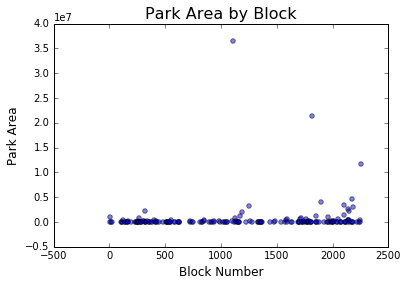

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(data2.Block,data2.Park_Area,alpha = .5, s = 20)
plt.xlabel('Block Number', fontsize = 12)
plt.ylabel('Park Area', fontsize = 12)
plt.title('Park Area by Block', fontsize = 16)

In [18]:
import statsmodels.api as sm
y = data2.Park_Area
x = data2.Total_Area
X = sm.add_constant(x)
#print X
model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
fit = model.fit()
fit.params[1], fit.params[0] # could also return stderr in each via fit.bse

(0.93893897435410967, -204431.79611967353)

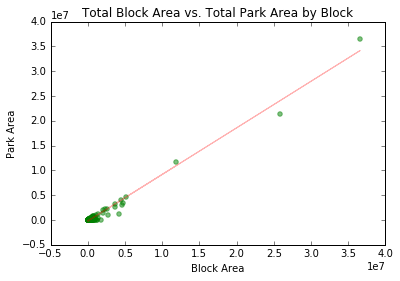

In [19]:
#fit and plots here
plt.figure(figsize=(6, 4))
xlabel('Block Area')
ylabel('Park Area')
plt.title('Total Block Area vs. Total Park Area by Block')
plt.scatter(x, y, alpha=.5, s=20, color = 'g')
plt.plot(x, fit.params[1]*x + fit.params[0], '-', color = 'r', alpha = .3)
plt.show()

In [20]:
#data.to_csv('Park_Area_Block.csv')

In [62]:
Park= pd.read_csv('Park_Area_Block.csv')
Park = Park[['Block','Total_Area','Park_Area','park_ratio']]
#Park = Park[Park['Park_Area']>0]
Park_DT = Park
Park.head()

,Block,Total_Area,Park_Area,park_ratio
0,1,11042768,0,0.000000
1,2,949542,0,0.000000
2,3,1142725,1018925,89.166247
3,4,111382,0,0.000000
4,5,108046,0,0.000000


In [91]:
Block_DT = Block_DT.astype(int).tolist()

In [94]:
for i in Block_DT:
    DT_Park[i] = Park[i]

KeyError: 1

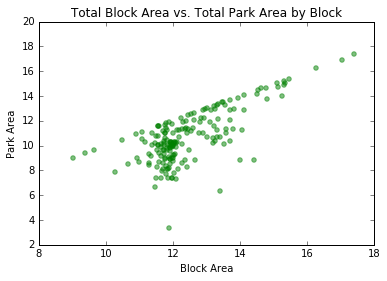

In [56]:
#fit and plots here
x = log(Park.Total_Area)
y = log(Park.Park_Area)
plt.figure(figsize=(6, 4))
xlabel('Block Area')
ylabel('Park Area')
plt.title('Total Block Area vs. Total Park Area by Block')
plt.scatter(x, y, alpha=.5, s=20, color = 'g')
#plt.plot(x, fit.params[1]*x + fit.params[0], '-', color = 'r', alpha = .3)
plt.show()

In [50]:
max (Park['Park_Area'])

36590000.0

In [22]:
#Subset Downtown Manhattan data.
#DM: Downtown Manhattan, Community District as 101, 102, 103.

DM = Mn [(Mn.CD==101)|(Mn.CD==102)|(Mn.CD==103)] 

In [23]:
print "The number of lot in Manhattan Borough is {0}.".format(len (Mn)) 
print "The number of lot in Downtown Manhattan (Community District 101, 102, 103) is {0}.".format(len (DM)) 

The number of lot in Manhattan Borough is 43231.
The number of lot in Downtown Manhattan (Community District 101, 102, 103) is 10564.


In [24]:
DM.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'Address', u'ZoneDist1', u'ZoneDist2', u'ZoneDist3',
       u'ZoneDist4', u'Overlay1', u'Overlay2', u'SPDist1', u'SPDist2',
       u'LtdHeight', u'AllZoning1', u'AllZoning2', u'SplitZone', u'BldgClass',
       u'LandUse', u'Easements', u'OwnerType', u'OwnerName', u'LotArea',
       u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea',
       u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource',
       u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront',
       u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode',
       u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand', u'AssessTot',
       u'ExemptLand', u'ExemptTot', u'YearBuilt', u'BuiltCode', u'YearAlter1',
       u'YearAlter2', u'HistDist', u'Landmark', u'BuiltFAR', u'ResidFAR',
       u'CommFAR', u'FacilFAR', u'

In [25]:
#Now we group lot data by land use types, land use '9' is coded as 'Open Space & Outdoor Recreation'.
LotArea_LandUse = DM.groupby('LandUse').sum().LotArea
print LotArea_LandUse

LandUse
       5651828
1      1093737
10     1187100
11     3705761
2      5443458
3     13887805
4     17535549
5     13640060
6      1812135
7     10192062
8     16103890
9      7721201
Name: LotArea, dtype: float64


In [26]:
#Subset Open Space.
DM_Open = DM [DM.LandUse=='9']
len (DM_Open)

120

In [27]:
#Calculate total lot area of all lots and open space, get the total area of 'Non Open Space'.
Mn_LotArea = sum (DM.LotArea)
OpenArea = sum (DM_Open.LotArea)
Non_OpenArea = Mn_LotArea - OpenArea 
print "Total lot area in Downtown Manhattan is {0} square feet.".format(Mn_LotArea) 
print "Open space lot area in Downtown Manhattan is {0} square feet.".format(OpenArea) 
#print "Open space ratio in Downtown Manhattan is {0}%.".format((ParkArea/Mn_LotArea)*100 )

Total lot area in Downtown Manhattan is 97974586.0 square feet.
Open space lot area in Downtown Manhattan is 7721201.0 square feet.


In [28]:
#Now we calculate total Land Area of Downtown Manhattan.
CD101 = 32979565
CD102 = 37720826
CD103 = 46882431
Mn_LandArea = CD101+CD102+CD103
print "Therefore,"
print "Total land area in Downtown Manhattan is: {0} square feet.".format(Mn_LandArea) 
print "Total non open space lot area in Downtown Manhattan is: {0} square feet.".format(Non_OpenArea) 
print "Open space area in Downtown Manhattan is: {0} square feet.".format(Mn_LandArea-Non_OpenArea) 
print 
print "Open space area ratio in Downtown Manhattan is: {0}%.".format((Mn_LandArea-Non_OpenArea)/Mn_LandArea*100) 

Therefore,
Total land area in Downtown Manhattan is: 117582822 square feet.
Total non open space lot area in Downtown Manhattan is: 90253385.0 square feet.
Open space area in Downtown Manhattan is: 27329437.0 square feet.

Open space area ratio in Downtown Manhattan is: 23.2427122731%.


In [29]:
#We can also use Zoning code 'Park' to subset public space.
print 'All unique Zoning Code in Manhattan:'
print Mn.ZoneDist1.unique()

All unique Zoning Code in Manhattan:
['R3-2     ' 'ZNA      ' 'M1-4     ' 'C4-6     ' 'PARK     ' 'C5-5     '
 '         ' 'C6-4     ' 'BPC      ' 'M2-3     ' 'C6-9     ' 'C5-3     '
 'R8       ' 'C6-2A    ' 'R7-2     ' 'C6-3     ' 'C6-3A    ' 'C6-4A    '
 'C6-1     ' 'C6-1G    ' 'M1-5     ' 'C6-2G    ' 'M1-5B    ' 'M1-6     '
 'M1-5A    ' 'C2-8     ' 'C8-4     ' 'C6-2     ' 'R7A      ' 'R8A      '
 'C4-4A    ' 'M3-2     ' 'R8B      ' 'C1-6A    ' 'R7B      ' 'R8X      '
 'C1-7A    ' 'C1-9A    ' 'R6       ' 'C1-7     ' 'C2-6     ' 'R10      '
 'C4-5     ' 'C6-3X    ' 'C1-6     ' 'C6-2M    ' 'C6-4M    ' 'M2-4     '
 'M1-5/R7X ' 'C2-7     ' 'R6A      ' 'C6-5     ' 'C6-6     ' 'C6-7     '
 'C2-6A    ' 'C2-7A    ' 'M1-6D    ' 'C6-4X    ' 'C6-4.5   ' 'C5-2     '
 'M1-5M    ' 'R9X      ' 'C5-2.5   ' 'R9A      ' 'C2-8A    ' 'C4-5A    '
 'C1-9     ' 'C1-8A    ' 'R9       ' 'C1-8     ' 'M1-1     ' 'C6-7T    '
 'C6-5.5   ' 'C6-6.5   ' 'C5-1     ' 'R10H     ' 'C4-7     ' 'R10A     '
 'C4-6A    ' '

In [30]:
#Subset lot defined by zoning code 'Park':
Mn_Park = Mn[Mn.ZoneDist1 =='PARK     ']
len (Mn_Park)

269

In [31]:
ParkArea = sum (Mn_Park.LotArea)
print "Total lot area in Downtown Manhattan is {0} square feet.".format(Mn_LotArea) 
print "Park lot area in Downtown Manhattan is {0} square feet.".format(ParkArea) 
print "Park lot area ratio in Downtown Manhattan is {0}%.".format((ParkArea/Mn_LotArea)*100 )

Total lot area in Downtown Manhattan is 97974586.0 square feet.
Park lot area in Downtown Manhattan is 118032766.0 square feet.
Park lot area ratio in Downtown Manhattan is 120.472839763%.


In [32]:
#This is incorrect since the park area is bigger than total lot area! 
#Therefore we are suspicious about if there is any incorrect data, 
#especially some lot with worng, extremly large lot area.

print "The largest park lot in Downtown Manhattan is {0} square feet, which is {1}% of total land area.".format(max (Mn_Park.LotArea), (max (Mn_Park.LotArea)/Mn_LotArea)*100)

The largest park lot in Downtown Manhattan is 36590000.0 square feet, which is 37.3464196113% of total land area.


__Conclusion:__ Based on common kownledge, we know there is no one lot park area as 37% of total land area in Downtown Manhattan.